## Data Understanding

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR



import time


In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df['YrSold'].max()

2010

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
len(df.select_dtypes(include=['int64']).columns)

35

In [5]:
len(df.select_dtypes(include=['float64']).columns)


3

In [6]:
len(df.select_dtypes(include=['object']).columns)


43

### target variable distribution

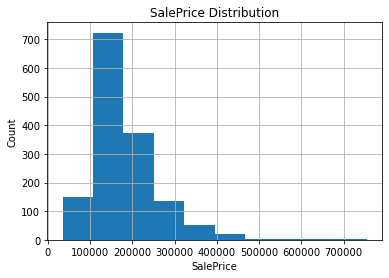

In [7]:
df['SalePrice'].hist()
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('SalePrice Distribution')
plt.show()

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
df['SalePrice'].mode()

0    140000
dtype: int64

In [10]:
df['SalePrice'].median()

163000.0

## Data Preprocessing

### Missing value

In [11]:
null = df.isnull().sum() [ df.isnull().sum() >= 1]
null

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
# drop the columns that has more than 50% null value 
df = df.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'])

In [13]:
null = df.isnull().sum() [ df.isnull().sum() >= 1]
null

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [14]:
# impute the missing value

for feature in null.index:
    if df[feature].dtype == object:
        df[feature].fillna(df[feature].mode()[0],inplace=True)
    else:
        df[feature].fillna(df[feature].median(),inplace=True)

In [15]:
df.isnull().sum() [ df.isnull().sum() >= 1]

Series([], dtype: int64)

### Correlation Matrix 

In [16]:
correlation = df.corr()
print(correlation)

# correlation = df[df.select_dtypes(include=['int64']).columns[:10]].corr()


               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.178469  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.214367  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.042463  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.124098 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808   

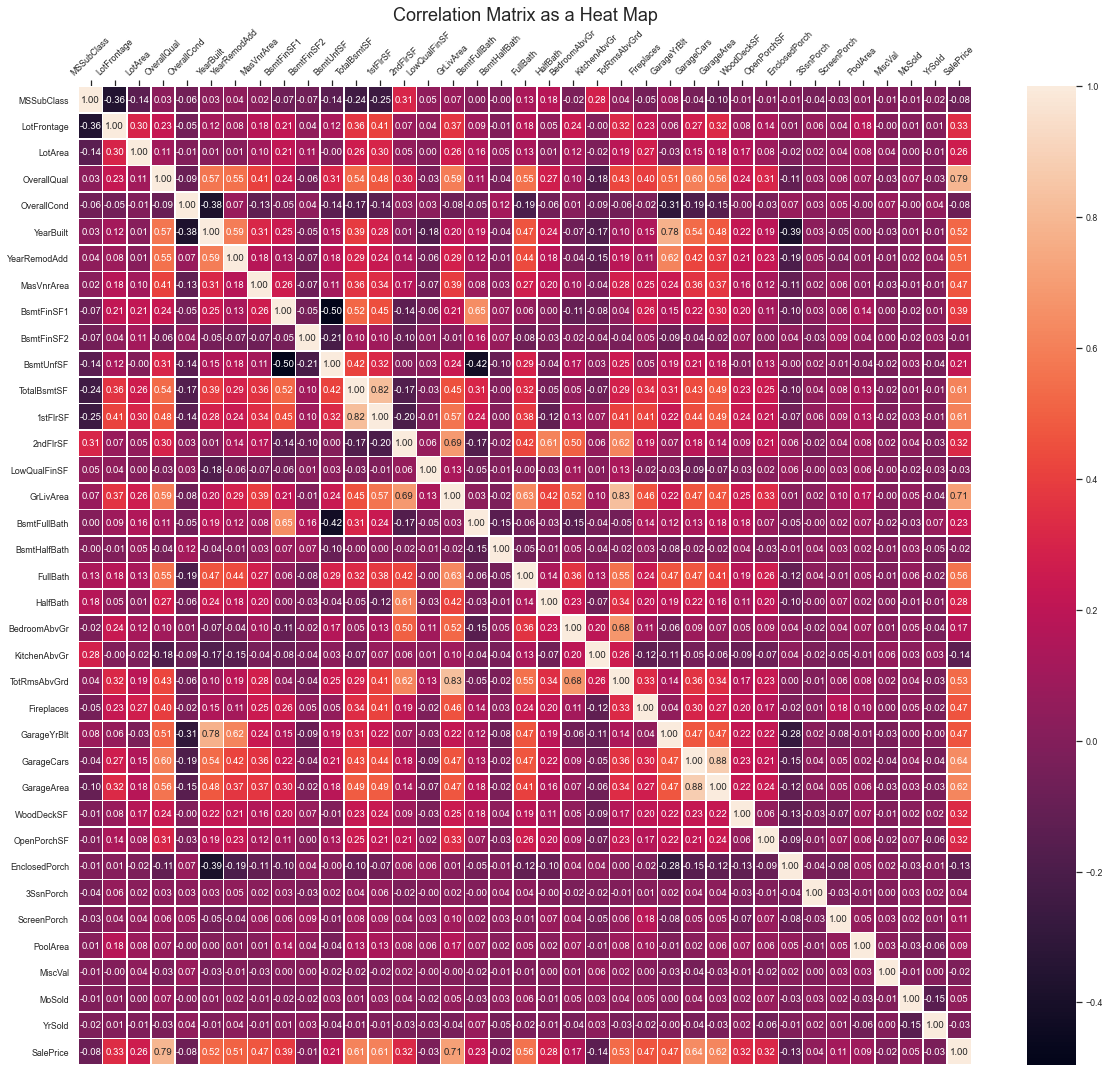

In [17]:
plt.figure(figsize=(20, 18))
sns.set(font_scale=0.8) 
sns.heatmap(correlation, annot=True,fmt=".2f",linewidths=0.5).xaxis.tick_top()
plt.xticks(rotation=45)
plt.title("Correlation Matrix as a Heat Map",fontsize=18)
plt.show()

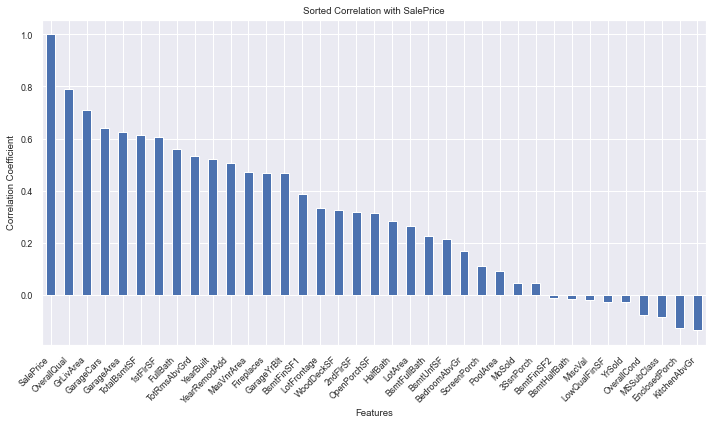

In [18]:
sorted_correlation_with_price = correlation['SalePrice'].sort_values(ascending=False)
sorted_correlation_with_price.plot(kind='bar', figsize=(10, 6))

plt.title('Sorted Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

### Categorical feature

In [19]:
for feature in df:
    if df[feature].dtype == object:
        print(feature)
        print(df[feature].unique())
        
#         df[feature].hist()
#         print(feature)
#         plt.show()
#         print(df[feature].value_counts() )
        
# df.select_dtypes(include=['object'])

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [20]:
df.shape

(1460, 76)

In [21]:
# One Hot Encoding
df = pd.get_dummies(df ,  drop_first=False)

In [22]:
df.shape

(1460, 276)

## check collinearity columns

In [23]:
correlation = df.corr()

high_correlation = (correlation > 0.7) & (correlation< 1.0)

high_correlation_pairs = []

for col1 in correlation.columns:
    for col2 in correlation.columns:
        if high_correlation.loc[col1, col2]:
            high_correlation_pairs.append((col1, col2))

for pair in high_correlation_pairs:
    col1, col2 = pair
    correlation_value = correlation.loc[col1, col2]
    print(f"Columns '{col1}' and '{col2}' have correlation: {correlation_value:.2f}")


Columns 'OverallQual' and 'SalePrice' have correlation: 0.79
Columns 'YearBuilt' and 'GarageYrBlt' have correlation: 0.78
Columns 'TotalBsmtSF' and '1stFlrSF' have correlation: 0.82
Columns '1stFlrSF' and 'TotalBsmtSF' have correlation: 0.82
Columns '2ndFlrSF' and 'HouseStyle_2Story' have correlation: 0.81
Columns 'GrLivArea' and 'TotRmsAbvGrd' have correlation: 0.83
Columns 'GrLivArea' and 'SalePrice' have correlation: 0.71
Columns 'TotRmsAbvGrd' and 'GrLivArea' have correlation: 0.83
Columns 'GarageYrBlt' and 'YearBuilt' have correlation: 0.78
Columns 'GarageCars' and 'GarageArea' have correlation: 0.88
Columns 'GarageArea' and 'GarageCars' have correlation: 0.88
Columns 'SalePrice' and 'OverallQual' have correlation: 0.79
Columns 'SalePrice' and 'GrLivArea' have correlation: 0.71
Columns 'MSZoning_FV' and 'Neighborhood_Somerst' have correlation: 0.86
Columns 'Neighborhood_Somerst' and 'MSZoning_FV' have correlation: 0.86
Columns 'Condition2_RRAe' and 'RoofStyle_Shed' have correlatio

上面检查出来high correlation （collinearity ）的column

然后下面的code是把每一对collinearity和saleprice 相对比， 删除那些和saleprice correlation 低的column。 

In [24]:
sorted_correlation_with_price = correlation['SalePrice'].sort_values(ascending=False)

collinearity_columns = []
collinearity_pair = []

for pair in high_correlation_pairs:
    col1, col2 = pair
    print(col1, sorted_correlation_with_price[col1])
    print(col2, sorted_correlation_with_price[col2])
    print("")
    
    if col1 == 'SalePrice' or col2 == 'SalePrice': continue
        
    if sorted_correlation_with_price[col1] > sorted_correlation_with_price[col2]:

        collinearity_columns.append(col2)


OverallQual 0.7909816005838053
SalePrice 1.0

YearBuilt 0.5228973328794967
GarageYrBlt 0.4667536523633407

TotalBsmtSF 0.6135805515591943
1stFlrSF 0.6058521846919153

1stFlrSF 0.6058521846919153
TotalBsmtSF 0.6135805515591943

2ndFlrSF 0.31933380283206736
HouseStyle_2Story 0.24288002726854338

GrLivArea 0.7086244776126515
TotRmsAbvGrd 0.5337231555820284

GrLivArea 0.7086244776126515
SalePrice 1.0

TotRmsAbvGrd 0.5337231555820284
GrLivArea 0.7086244776126515

GarageYrBlt 0.4667536523633407
YearBuilt 0.5228973328794967

GarageCars 0.6404091972583519
GarageArea 0.6234314389183622

GarageArea 0.6234314389183622
GarageCars 0.6404091972583519

SalePrice 1.0
OverallQual 0.7909816005838053

SalePrice 1.0
GrLivArea 0.7086244776126515

MSZoning_FV 0.08994971967036074
Neighborhood_Somerst 0.1400579963436251

Neighborhood_Somerst 0.1400579963436251
MSZoning_FV 0.08994971967036074

Condition2_RRAe 0.0029929320927850416
RoofStyle_Shed 0.02055710256278189

HouseStyle_2Story 0.24288002726854338
2ndFlr

In [25]:
collinearity_columns

['GarageYrBlt',
 '1stFlrSF',
 'HouseStyle_2Story',
 'TotRmsAbvGrd',
 'GarageArea',
 'MSZoning_FV',
 'RoofMatl_Tar&Grv',
 'Condition2_RRAe',
 'Exterior2nd_CmentBd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Sdng',
 'Exterior1st_AsbShng',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_VinylSd',
 'BsmtCond_Po',
 'GarageCond_Ex',
 'SaleCondition_Partial']

In [26]:
df = df.drop(columns=collinearity_columns)


In [27]:
df.shape

(1460, 257)

### check the model with low correlation value

In [28]:
correlation = df.corr()
sorted_correlation_with_price = abs(correlation['SalePrice'].sort_values(ascending=False))
sorted_correlation_with_price[:10]

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
TotalBsmtSF       0.613581
FullBath          0.560664
BsmtQual_Ex       0.553105
YearBuilt         0.522897
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
Name: SalePrice, dtype: float64

In [29]:
correlation_low = sorted_correlation_with_price[sorted_correlation_with_price < 0.2].index
correlation_low


Index(['MasVnrType_BrkFace', 'GarageFinish_RFn', 'RoofMatl_WdShngl',
       'BedroomAbvGr', 'FireplaceQu_TA', 'LotConfig_CulDSac',
       'Neighborhood_Somerst', 'BldgType_1Fam', 'BsmtExposure_Av',
       'GarageCond_TA',
       ...
       'KitchenQual_Fa', 'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd',
       'HouseStyle_1.5Fin', 'Neighborhood_IDOTRR', 'Neighborhood_Edwards',
       'Neighborhood_NAmes', 'Neighborhood_OldTown', 'Electrical_FuseA',
       'FireplaceQu_Gd'],
      dtype='object', length=196)

In [30]:
df = df.drop(columns=correlation_low)

In [31]:
df.shape

(1460, 61)

In [32]:
df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior2nd_VinylSd', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtExposure_No', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'HeatingQC_TA',
       'CentralAir_N', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_Ex',
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Ex',
       'GarageType_Attchd', 'GarageType_BuiltIn

## check for outliers

In [33]:
# import pandas as pd

# Q1 = df.quantile(0.05)
# Q3 = df.quantile(0.95)
# IQR = Q3 - Q1

# outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=0)

# outlier_columns = df.columns[outliers]
# df[outlier_columns] = np.log1p(df[outlier_columns])

## Build Model with Feature Selection Base on Correlation Matrix

In [34]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from xgboost import XGBRegressor


In [36]:
algorithm_list = [LinearRegression(), RandomForestRegressor(),GradientBoostingRegressor(), 
                  XGBRegressor()]


rmse_scores = []
r2_scores = []

execution_times = []


for algorithm in algorithm_list:
    
    start_time = time.time()

    
    models = algorithm.fit(X_train,y_train)
    

    ypredicts = models.predict(X_test)
    
    r2 = r2_score(y_test, ypredicts)
    r2_scores.append(r2)
    
    
    rmse = mean_squared_error(y_test, ypredicts, squared=False)
    rmse_scores.append(rmse)
    
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)
        
    print(algorithm, )
    print('R2 score: {:.3f}'.format(r2))
    print('RMSE score: {:.3f}'.format(rmse))
    print('Execution time: {:.3f} seconds'.format(execution_time))
    print(' ')



LinearRegression()
R2 score: 0.870
RMSE score: 31522.302
Execution time: 0.011 seconds
 
RandomForestRegressor()
R2 score: 0.893
RMSE score: 28608.125
Execution time: 1.323 seconds
 
GradientBoostingRegressor()
R2 score: 0.906
RMSE score: 26843.237
Execution time: 0.439 seconds
 
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=No

### Feature selection using Random Forest 

In [37]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

df_importances = pd.Series(RF.feature_importances_, index = X.columns).sort_values(ascending=False)


In [38]:
df_importances

OverallQual             0.562376
GrLivArea               0.131434
TotalBsmtSF             0.050522
2ndFlrSF                0.034448
BsmtFinSF1              0.033430
GarageCars              0.029797
LotArea                 0.019102
YearBuilt               0.017802
YearRemodAdd            0.010820
LotFrontage             0.010433
OpenPorchSF             0.007796
FullBath                0.007695
BsmtQual_Ex             0.007613
BsmtUnfSF               0.007550
WoodDeckSF              0.006606
Fireplaces              0.006547
GarageFinish_Unf        0.006136
MasVnrArea              0.005296
BsmtQual_Gd             0.004196
GarageType_Detchd       0.003029
CentralAir_Y            0.002861
BsmtExposure_Gd         0.002091
KitchenQual_Gd          0.001751
BsmtExposure_No         0.001741
CentralAir_N            0.001699
KitchenQual_Ex          0.001646
LotShape_Reg            0.001623
GarageType_Attchd       0.001401
ExterQual_Gd            0.001323
SaleType_New            0.001317
Exterior2n

Text(0.5, 1.0, 'Random Forest Feature Importances')

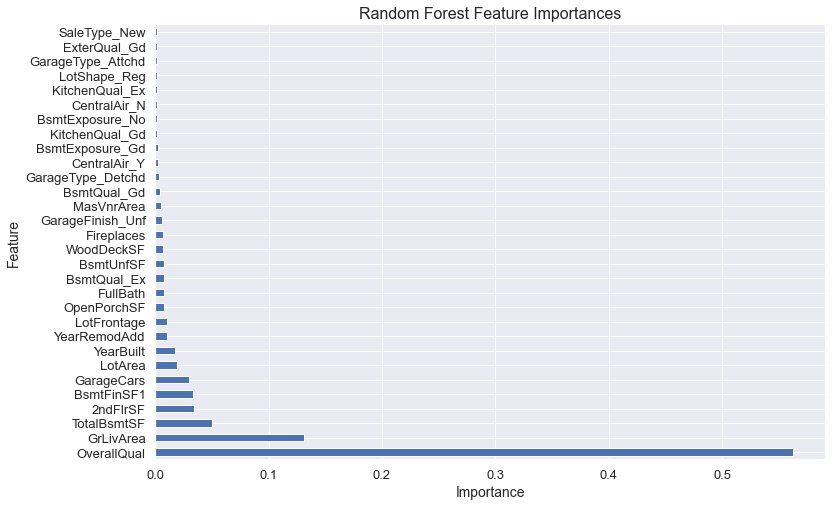

In [39]:
plt.figure(figsize=(12, 8))
df_importances[:30].plot(kind='barh')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tick_params(axis='both', labelsize=13)

plt.title('Random Forest Feature Importances',fontsize=16)

In [40]:
selected_features = df_importances[df_importances>0.001].index
selected_features

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
       'GarageCars', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'LotFrontage',
       'OpenPorchSF', 'FullBath', 'BsmtQual_Ex', 'BsmtUnfSF', 'WoodDeckSF',
       'Fireplaces', 'GarageFinish_Unf', 'MasVnrArea', 'BsmtQual_Gd',
       'GarageType_Detchd', 'CentralAir_Y', 'BsmtExposure_Gd',
       'KitchenQual_Gd', 'BsmtExposure_No', 'CentralAir_N', 'KitchenQual_Ex',
       'LotShape_Reg', 'GarageType_Attchd', 'ExterQual_Gd', 'SaleType_New',
       'Exterior2nd_VinylSd', 'MSZoning_RL', 'MSZoning_RM', 'ExterQual_Ex',
       'BsmtFinType1_GLQ'],
      dtype='object')

In [41]:
X_train_selected ,X_test_selected = X_train[selected_features], X_test[selected_features]

### Build Models with Feature Selection Based on Random Forest

In [42]:
algorithm_list = [LinearRegression(), RandomForestRegressor(),
                  GradientBoostingRegressor(), 
                  XGBRegressor()]


rmse_35 = []
r2_35 = []

execution_times35 = []


for algorithm in algorithm_list:
    
    start_time = time.time()

    
    models = algorithm.fit(X_train_selected,y_train)


    ypredicts = models.predict(X_test_selected)
    
    r2 = r2_score(y_test, ypredicts)
    r2_35.append(r2)
    
    
    rmse = mean_squared_error(y_test, ypredicts, squared=False)
    rmse_35.append(rmse)

    end_time = time.time()
    execution_time = end_time - start_time
    execution_times35.append(execution_time)
        
    print(algorithm, )
    print('R2 score: {:.3f}'.format(r2))
    print('RMSE score: {:.3f}'.format(rmse))
    print('Execution time: {:.3f} seconds'.format(execution_time))

    print(' ')

LinearRegression()
R2 score: 0.857
RMSE score: 33131.512
Execution time: 0.009 seconds
 
RandomForestRegressor()
R2 score: 0.891
RMSE score: 28959.766
Execution time: 1.120 seconds
 
GradientBoostingRegressor()
R2 score: 0.913
RMSE score: 25897.288
Execution time: 0.400 seconds
 
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=No

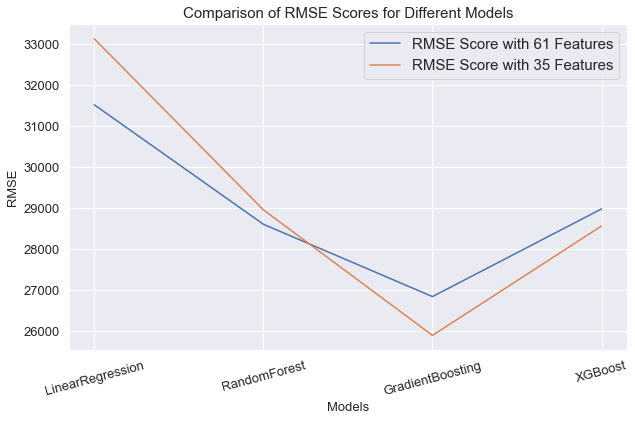

In [43]:
model = ['LinearRegression', 'RandomForest','GradientBoosting', 'XGBoost']


plt.figure(figsize=(10, 6))
plt.plot(model, rmse_scores, label ='RMSE Score with 61 Features')
plt.plot(model, rmse_35, label ='RMSE Score with 35 Features')

plt.title('Comparison of RMSE Scores for Different Models', fontsize = 15)
plt.xlabel('Models', fontsize =13)
plt.xticks(rotation=15)

plt.ylabel('RMSE', fontsize =13)
plt.legend(fontsize =15)

plt.tick_params(axis='both', labelsize=13)

plt.show()


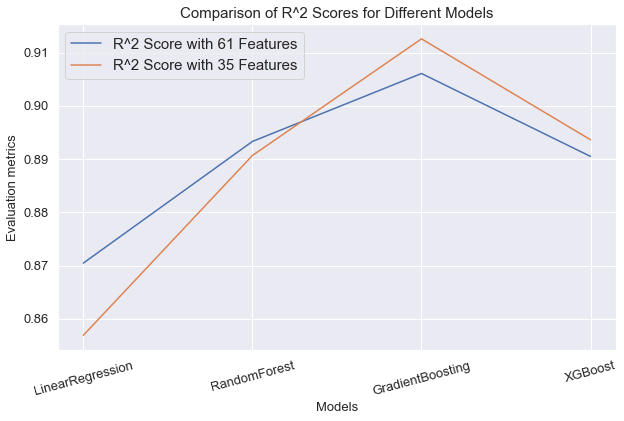

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(model, r2_scores, label = 'R^2 Score with 61 Features')
plt.plot(model, r2_35, label = 'R^2 Score with 35 Features')


plt.title('Comparison of R^2 Scores for Different Models', fontsize = 15)
plt.xlabel('Models', fontsize = 13)
plt.xticks(rotation=15)

plt.ylabel('Evaluation metrics', fontsize = 13)
plt.legend(fontsize=15)

plt.tick_params(axis='both', labelsize=13)

plt.show()


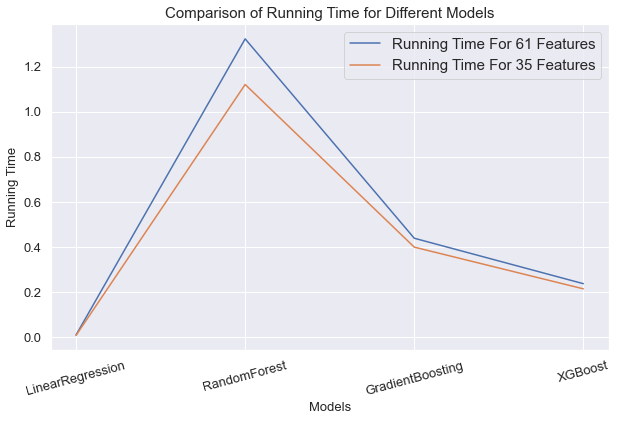

In [45]:
plt.figure(figsize=(10, 6))

plt.plot(model, execution_times, label ='Running Time For 61 Features')
plt.plot(model, execution_times35, label ='Running Time For 35 Features')


plt.title('Comparison of Running Time for Different Models', fontsize = 15)
plt.xlabel('Models', fontsize =13)
plt.xticks(rotation=15)

plt.ylabel('Running Time', fontsize = 13)
plt.legend(fontsize=15)

plt.tick_params(axis='both', labelsize=13)

plt.show()


### Hyperparameter Tuning for XGBoost


In [46]:
from sklearn.model_selection import GridSearchCV


parameters_xg = {'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
xg_model = XGBRegressor()
grid_xg = GridSearchCV(xg_model, parameters_xg, cv=5)
grid_xg.fit(X_train_selected, y_train)
print("Best parameters", grid_xg.best_params_)
print("Best score", grid_xg.best_score_)
print("Best estimator", grid_xg.best_estimator_)

Best parameters {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best score 0.8553066420852365
Best estimator XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [47]:
yp_xg = grid_xg.best_estimator_.predict(X_test_selected)
print('XGBoost metrics score after Hyperparameter tuning:')
print('R2 score : {:.3f}'.format(r2_score(y_test, yp_xg)))
print('RSME score: {:.3f}'.format(mean_squared_error(y_test, yp_xg, squared=False)))


XGBoost metrics score after Hyperparameter tuning:
R2 score : 0.912
RSME score: 25981.749


### Hyperparameter Tuning for Gradient Boosting


In [48]:
from sklearn.model_selection import GridSearchCV


param = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb= GradientBoostingRegressor()

grid = GridSearchCV(gb, param, cv=5)
grid.fit(X_train_selected, y_train)
print("Best parameters", grid.best_params_)
print("Best score", grid.best_score_)
print("Best estimator", grid.best_estimator_)

Best parameters {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score 0.8595125183476784
Best estimator GradientBoostingRegressor(learning_rate=0.2, min_samples_split=5,
                          n_estimators=200)


In [49]:
yp_gb = grid.best_estimator_.predict(X_test_selected)
print('Gardient Boosting metrics score after Hyperparameter tuning:')
print('R2 score : {:.3f}'.format(r2_score(y_test, yp_gb)))
print('RSME score: {:.3f}'.format(mean_squared_error(y_test, yp_gb, squared=False)))


Gardient Boosting metrics score after Hyperparameter tuning:
R2 score : 0.891
RSME score: 28980.197


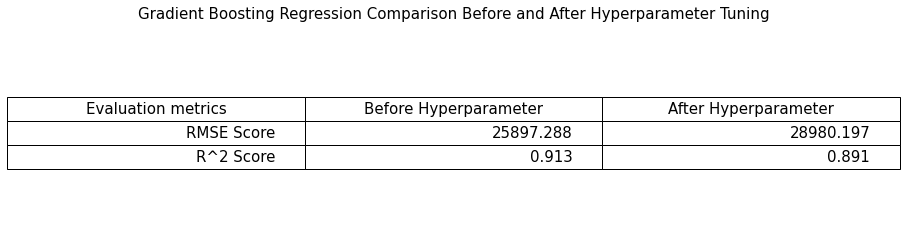

In [3]:
name = ['RMSE Score', 'R^2 Score']
before_hyper = [25897.288, 0.913]
after_hyper = [28980.197, 0.891]

fig, ax = plt.subplots(figsize=(8, 4))
table_data = [[name[i], before_hyper[i], after_hyper[i]] for i in range(len(name))]
table = ax.table(cellText=table_data, colLabels=['Evaluation metrics','Before Hyperparameter', 'After Hyperparameter'], loc='center')

table.set_fontsize(15)
table.scale(2, 2)

ax.axis('off')


plt.title('Gradient Boosting Regression Comparison Before and After Hyperparameter Tuning',fontsize=15)
plt.show()